# =============================================================

# modeling - Decision Tree

# =============================================================

# 2. Decision Tree

In [169]:
import pandas as pd
df0 = pd.read_excel('preprocess0.xlsx',sheetname = 0)
y_s = df0['Rescreen']

df0_p = df0['Published']
df0_p = pd.concat([df0_p], axis = 1)

f = lambda x : 2016-x
df0_p = df0_p.applymap(f)

df0_s = pd.concat([df0['RunningTime'], df0_p, df0['WholeAud'],df0['PoSA'],df0['Score']],axis = 1)
#df0_s1 = pd.concat([df0['RunningTime'], df0_p, df0['WholeAud'],df0['PoSA'],df0['Score']],axis = 1)

df0_s.head()

,RunningTime,Published,WholeAud,PoSA,Score
0,103,9,1708979,32.3,5.77
1,104,6,805,65.8,7.61
2,157,9,1924678,38.2,8.51
3,110,10,280,100.0,8.24
4,139,10,563056,26.1,8.27


In [170]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(df0_s, y_s, test_size=0.25, random_state=1)
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X_train, y_train)

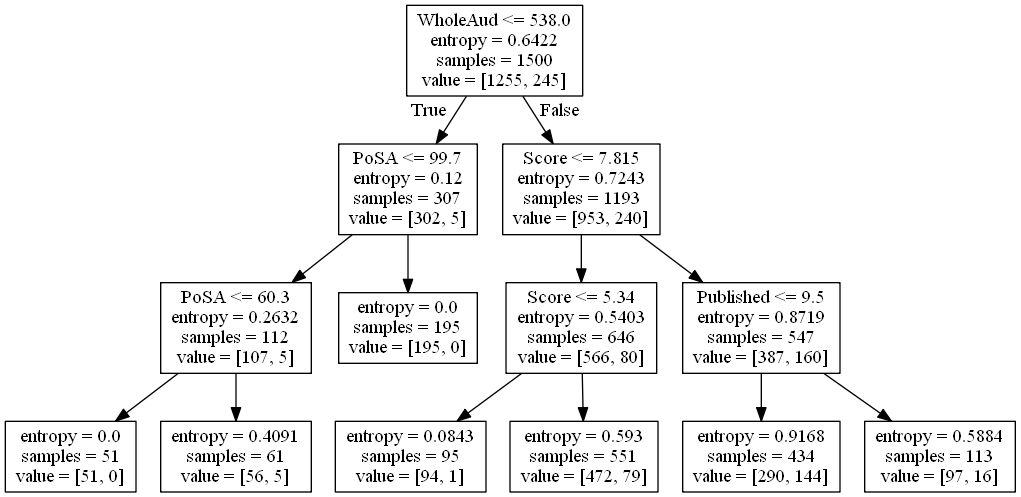

In [171]:
import pydot
import StringIO
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

command_buf = StringIO.StringIO() 
export_graphviz(model_DT, out_file=command_buf, feature_names=df0_s.columns) 
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0] 
image = graph.create_png()
image_buf = StringIO.StringIO() 
image_buf.write(image)
Image(image_buf.getvalue())

In [172]:
y_pred_DT = model_DT.predict(X_test)

print classification_report(y_test, y_pred_DT)

             precision    recall  f1-score   support

          0       0.82      1.00      0.90       408
          1       0.00      0.00      0.00        92

avg / total       0.67      0.82      0.73       500



In [126]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

scores = []
for i in range(5, 11):
    for j in range(1,11):
        X_train, X_test, y_train, y_test = train_test_split(df0, y, test_size=0.25, random_state=1)
        model_DT0 = DecisionTreeClassifier(criterion='entropy', max_depth=i, min_samples_leaf=j).fit(X_train, y_train)    
        y_pred = model_DT0.predict(X_test)
        report_dt = classification_report(y_test, y_pred)   
        scores.append((i,j,float(report_dt[125:129]), float(report_dt[135:139])))
        
scores

[(5, 1, 0.46, 0.4),
 (5, 2, 0.47, 0.4),
 (5, 3, 0.47, 0.41),
 (5, 4, 0.47, 0.41),
 (5, 5, 0.46, 0.41),
 (5, 6, 0.46, 0.41),
 (5, 7, 0.46, 0.41),
 (5, 8, 0.47, 0.4),
 (5, 9, 0.47, 0.4),
 (5, 10, 0.47, 0.4),
 (6, 1, 0.33, 0.04),
 (6, 2, 0.27, 0.04),
 (6, 3, 0.4, 0.07),
 (6, 4, 0.38, 0.07),
 (6, 5, 0.35, 0.07),
 (6, 6, 0.33, 0.07),
 (6, 7, 0.32, 0.07),
 (6, 8, 0.57, 0.26),
 (6, 9, 0.59, 0.26),
 (6, 10, 0.59, 0.25),
 (7, 1, 0.51, 0.3),
 (7, 2, 0.5, 0.3),
 (7, 3, 0.5, 0.32),
 (7, 4, 0.52, 0.32),
 (7, 5, 0.49, 0.33),
 (7, 6, 0.49, 0.33),
 (7, 7, 0.48, 0.33),
 (7, 8, 0.52, 0.26),
 (7, 9, 0.51, 0.26),
 (7, 10, 0.57, 0.25),
 (8, 1, 0.45, 0.23),
 (8, 2, 0.46, 0.23),
 (8, 3, 0.45, 0.22),
 (8, 4, 0.47, 0.24),
 (8, 5, 0.42, 0.24),
 (8, 6, 0.43, 0.24),
 (8, 7, 0.41, 0.24),
 (8, 8, 0.44, 0.25),
 (8, 9, 0.43, 0.25),
 (8, 10, 0.48, 0.24),
 (9, 1, 0.52, 0.3),
 (9, 2, 0.51, 0.32),
 (9, 3, 0.48, 0.32),
 (9, 4, 0.47, 0.3),
 (9, 5, 0.43, 0.27),
 (9, 6, 0.42, 0.27),
 (9, 7, 0.42, 0.27),
 (9, 8, 0.43, 0.25),


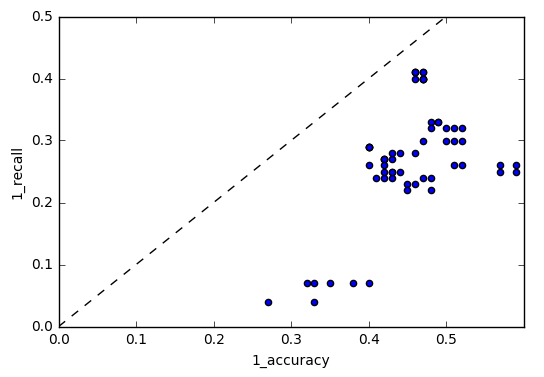

In [186]:
ac_rc_points_X = []
ac_rc_points_Y = []

for i in range(len(scores)):
    ac_rc_points_X.append(scores[i][2])
    ac_rc_points_Y.append(scores[i][3])


plt.scatter(ac_rc_points_X, ac_rc_points_Y)
plt.plot([0,0.6], [0, 0.6], 'k--')

plt.xlabel('1_accuracy')
plt.ylabel('1_recall')
plt.xlim([0,0.6])
plt.ylim([0,0.5])
plt.show()

             precision    recall  f1-score   support

          0       0.87      0.89      0.88       408
          1       0.47      0.41      0.44        92

avg / total       0.80      0.81      0.80       500



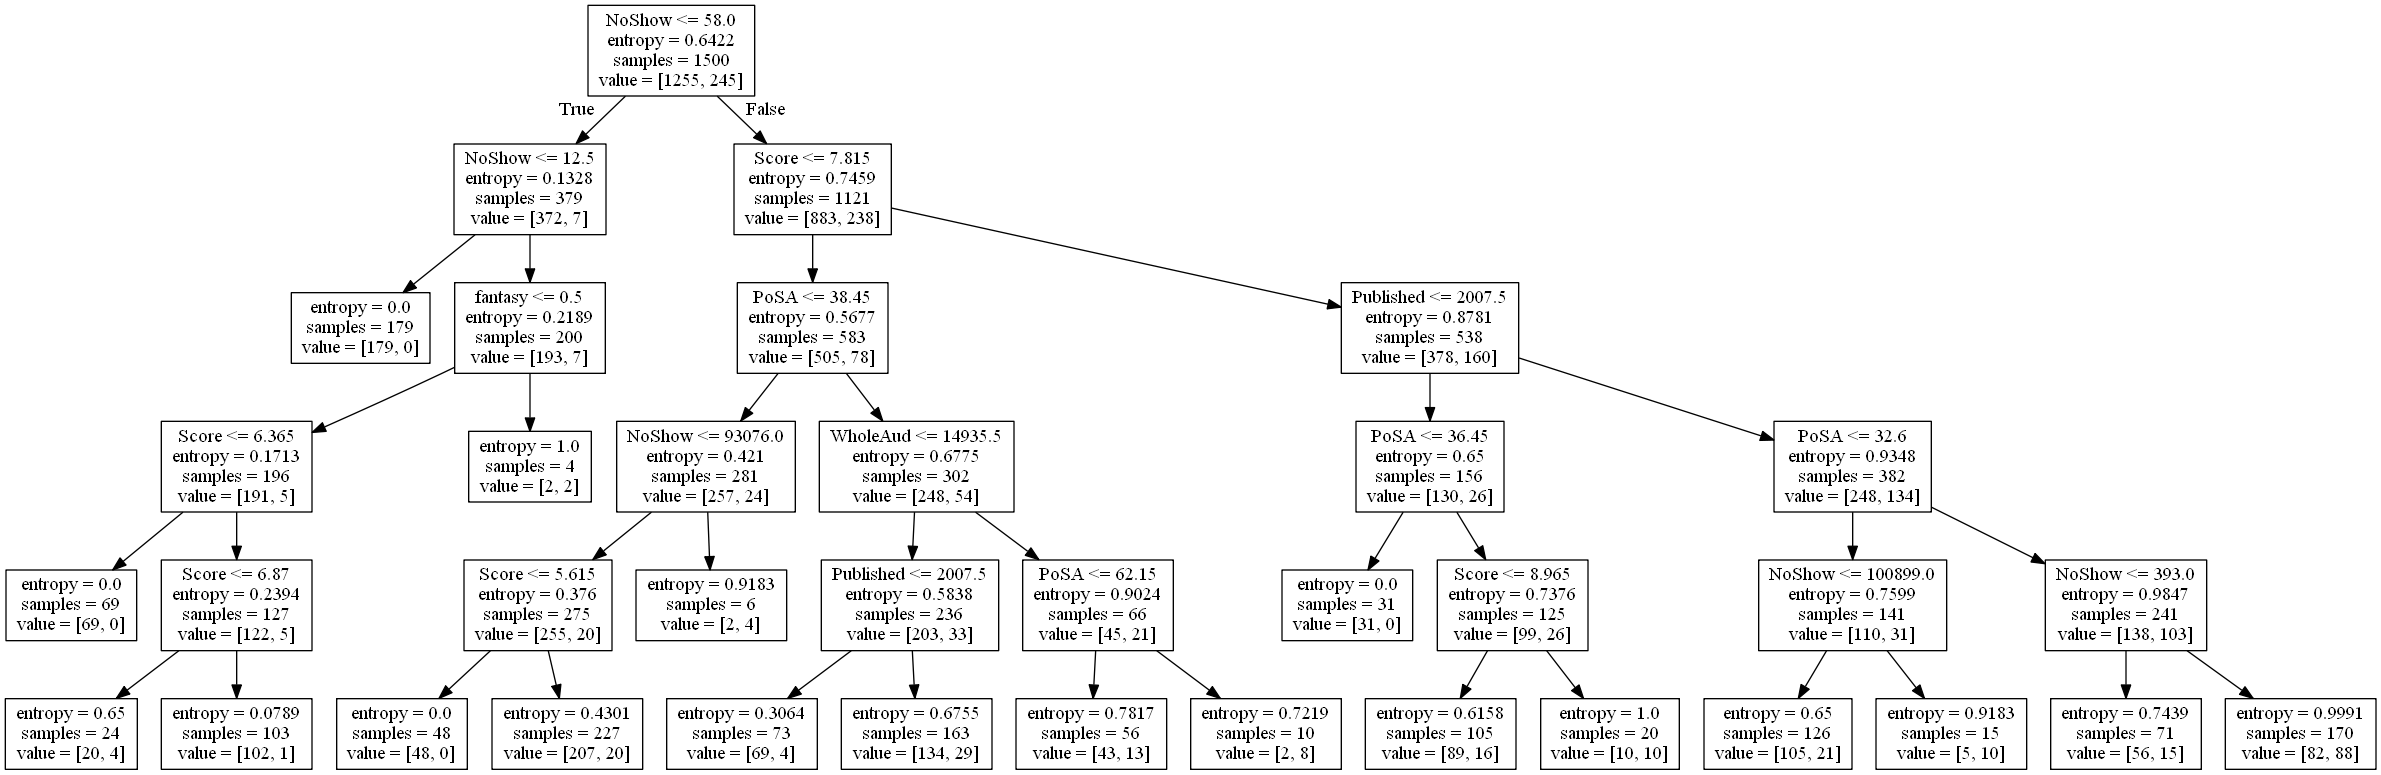

In [127]:
# depth가 커질수록 overfitting! 최대한 작게하고, accuracy와 recall이 괜찮은 파라미터를 선택!-> max_depth=5, min_samples_leaf=4

X_train, X_test, y_train, y_test = train_test_split(df0, y, test_size=0.25, random_state=1)
model_DT0 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4).fit(X_train, y_train)    
y_pred = model_DT0.predict(X_test)
print classification_report(y_test, y_pred)
    
command_buf = StringIO.StringIO() 
export_graphviz(model_DT0, out_file=command_buf, feature_names=df0.columns) 
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0] 
image = graph.create_png()
image_buf = StringIO.StringIO() 
image_buf.write(image)
Image(image_buf.getvalue())

In [158]:
df_test = pd.read_excel('movie_test_data.xlsx',sheetname = 2)
df_test0 = df_test.drop(['Name','Code','Released','SeoulAud','NoScreen','Rescreen'],axis = 1)
df_test0.head()

,Genre,Level,RunningTime,Country,Published,Win,WholeAud,PoSA,NoShow,BoxOffice,TV,Score
0,drama,adult,120,italia,2009,0,35531,78.3,1174,0,0,7.93
1,drama,over15,54,korea,2009,0,5249,67.7,334,0,0,7.52
2,drama,over12,111,usa,2009,0,73309,34.4,6902,0,0,8.38
3,comedy,all,83,france,2002,0,28799,57.1,1332,0,0,8.78
4,drama,adult,69,korea,2013,0,5530,3.6,38,0,0,2.64


In [150]:
Genre_d = pd.get_dummies(df_test0['Genre'])
Level_d = pd.get_dummies(df_test0['Level'])
Country_d = pd.get_dummies(df_test0['Country'])

In [152]:
df_test1 = pd.concat([df_test0['RunningTime'],df_test0['Published'],df_test0['Win'],df_test0['WholeAud'],df_test0['PoSA'],df_test0['BoxOffice'],df_test0['TV'],df_test0['Score'],Genre_d,Level_d,Country_d],axis = 1)
df_test1.head()

,RunningTime,Published,Win,WholeAud,PoSA,BoxOffice,TV,Score,SF,action,...,mexico,nederland,portugal,russia,spain,tai,tailand,turkey,usa,vietnam
0,120,2009,0,35531,78.3,0,0,7.93,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,54,2009,0,5249,67.7,0,0,7.52,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,111,2009,0,73309,34.4,0,0,8.38,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,83,2002,0,28799,57.1,0,0,8.78,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,69,2013,0,5530,3.6,0,0,2.64,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
df_test_d = pd.DataFrame(data = df_test1,columns=df0.columns)
df_test_c = df_test_d.fillna(0)
df_test_c.head()

,RunningTime,Published,Win,WholeAud,PoSA,NoShow,BoxOffice,TV,Score,SF,...,singapore,southafranceica,spain,sweden,swiss,tai,tailand,taiwan,uruguay,usa
0,120,2009,0,35531,78.3,0.0,0,0,7.93,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,54,2009,0,5249,67.7,0.0,0,0,7.52,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,111,2009,0,73309,34.4,0.0,0,0,8.38,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,83,2002,0,28799,57.1,0.0,0,0,8.78,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,69,2013,0,5530,3.6,0.0,0,0,2.64,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
y_pred_DT0 = model_DT0.predict(df_test_c)

DT_result0 = pd.DataFrame(columns=['name', 'original', 'pred'])

for i in range(len(y_pred_DT)):
    DT_result0.loc[len(DT_result0)] = [df_test['Name'][i],y_pred_DT0[i], df_test['Rescreen'][i]]
    
DT_result0.head()

,name,original,pred
0,아이 엠 러브,0.0,1.0
1,친구사이?,0.0,0.0
2,드림업,0.0,0.0
3,버터플라이,0.0,0.0
4,비밀의 화방,0.0,0.0


In [164]:
print classification_report(df_test['Rescreen'], y_pred_DT0)

             precision    recall  f1-score   support

          0       0.87      1.00      0.93       110
          1       0.00      0.00      0.00        16

avg / total       0.76      0.87      0.81       126

